In [2]:
from IPython.display import HTML, display
html_code = """
<h1 style = 'background-color: black;
color: aqua; font-size: 30px;
border-radius: 20px;
padding: 16px;
text-align: center;'>
<b style='color:white;'>
SUPPORT VECTOR MACHINES:</b>
BANK MARKETING</h1>
"""
display(HTML(html_code))

In [53]:
import numpy as np # Algebra Lineal
import pandas as pd # Manejo de datos
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos estadísticos
import plotly.express as px # Gráficos interactivos

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [4]:
# Ruta de los datos
ruta = r"C:\Users\Educa informatica\Desktop\CIENCIAS DE DATOS\CSV, EXCELS, ETC\archivos csv\bank-full.csv"
# Cargar los datos en un dataframe
df = pd.read_csv(ruta, sep=";")

In [5]:
# Primera vista de los datos
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


##### **CARACTERÍSTICAS DEL DATASET:**
- **age:** edad
- **job:** ocupación
- **marital:** estado civil
- **education:** nivel educativo
- **default:** tiene el crédito en default?
- **balance:** balance anual promedio
- **housing:** tiene hipoteca?
- **loan:** tiene préstamos personales?
- **contact:** dispositivo de comunicación
- **day y month:** última fecha de contacto
- **duration:** duración del último contacto en segundos
- **campaign:** cantidad de contactos hechos durante la campaña
- **pdays:** cantidad de días que pasaron desde el último contacto de la anterior campaña (-1 es que nunca fue contactado)
- **previous:** cantidad de contactos antes de esta campaña
- **poutcome:** resultado de la campaña anterior
- **y:** objetivo, se suscribió el cliente?

In [6]:
html_eda = """
<h1 style= 'background-color: black;
color: aqua; font-size: 30px;
border-radius: 20px;
padding: 16px;
text-align: center;'>
ANÁLISIS DE DATOS EXPLORATORIO </h1>
"""
display(HTML(html_eda))

In [7]:
# Observar estructura del dataset
def estructura_dataframe(df):
    print(f"Cantidad de filas: {df.shape[0]}")
    print(f"Cantidad de columnas: {df.shape[1]}")
    print(f"Cantidad de datos: {df.size}")
    print(f"Columnas: {df.columns}")
# Aplicar a nuestros datos
estructura_dataframe(df)

Cantidad de filas: 45211
Cantidad de columnas: 17
Cantidad de datos: 768587
Columnas: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [8]:
# Observar valores duplicados
print(f"Hay valores duplicados? \n {'No' if df.duplicated().any() == False else 'Si'}")

Hay valores duplicados? 
 No


In [9]:
# Valores nulos
print(f"Hay valores nulos? \n {'No' if df.isnull().any().any() == False else 'Si'}")

Hay valores nulos? 
 No


In [10]:
# Información adicional
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### **VARIABLES CATEGÓRICAS**

In [11]:
# Obtenemos las variables categóricas
categoricas = [col for col in df.columns if df[col].dtype == "object"]
categoricas.pop() # Eliminar la variable target ya que luego la analizaremos por separado
print(f"Cantidad de variables categóricas: {len(categoricas)}")
print(f"Columnas categóricas: {categoricas}")

Cantidad de variables categóricas: 9
Columnas categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [12]:
# Cardinalidad
for col in categoricas:
    print(col, ":", df[col].nunique())

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4


In [13]:
# Valores de las columnas
for col in categoricas:
    print(col, ":", df[col].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'failure' 'other' 'success']


In [14]:
# Valores unknown
for col in categoricas:
    print(col, ":", (df[col] == "unknown").sum())

job : 288
marital : 0
education : 1857
default : 0
housing : 0
loan : 0
contact : 13020
month : 0
poutcome : 36959


In [15]:
# Cuanto representan los unknown en su respectiva columna
for col in categoricas:
    print(col, ":", (df[col] == "unknown").sum() / len(df) * 100, "%")

job : 0.6370131162770122 %
marital : 0.0 %
education : 4.1074074893278185 %
default : 0.0 %
housing : 0.0 %
loan : 0.0 %
contact : 28.798301298356595 %
month : 0.0 %
poutcome : 81.74780473778506 %


In [16]:
# Observamos la moda de cada columna
for col in categoricas:
    print(df[col].value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: int64
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other  

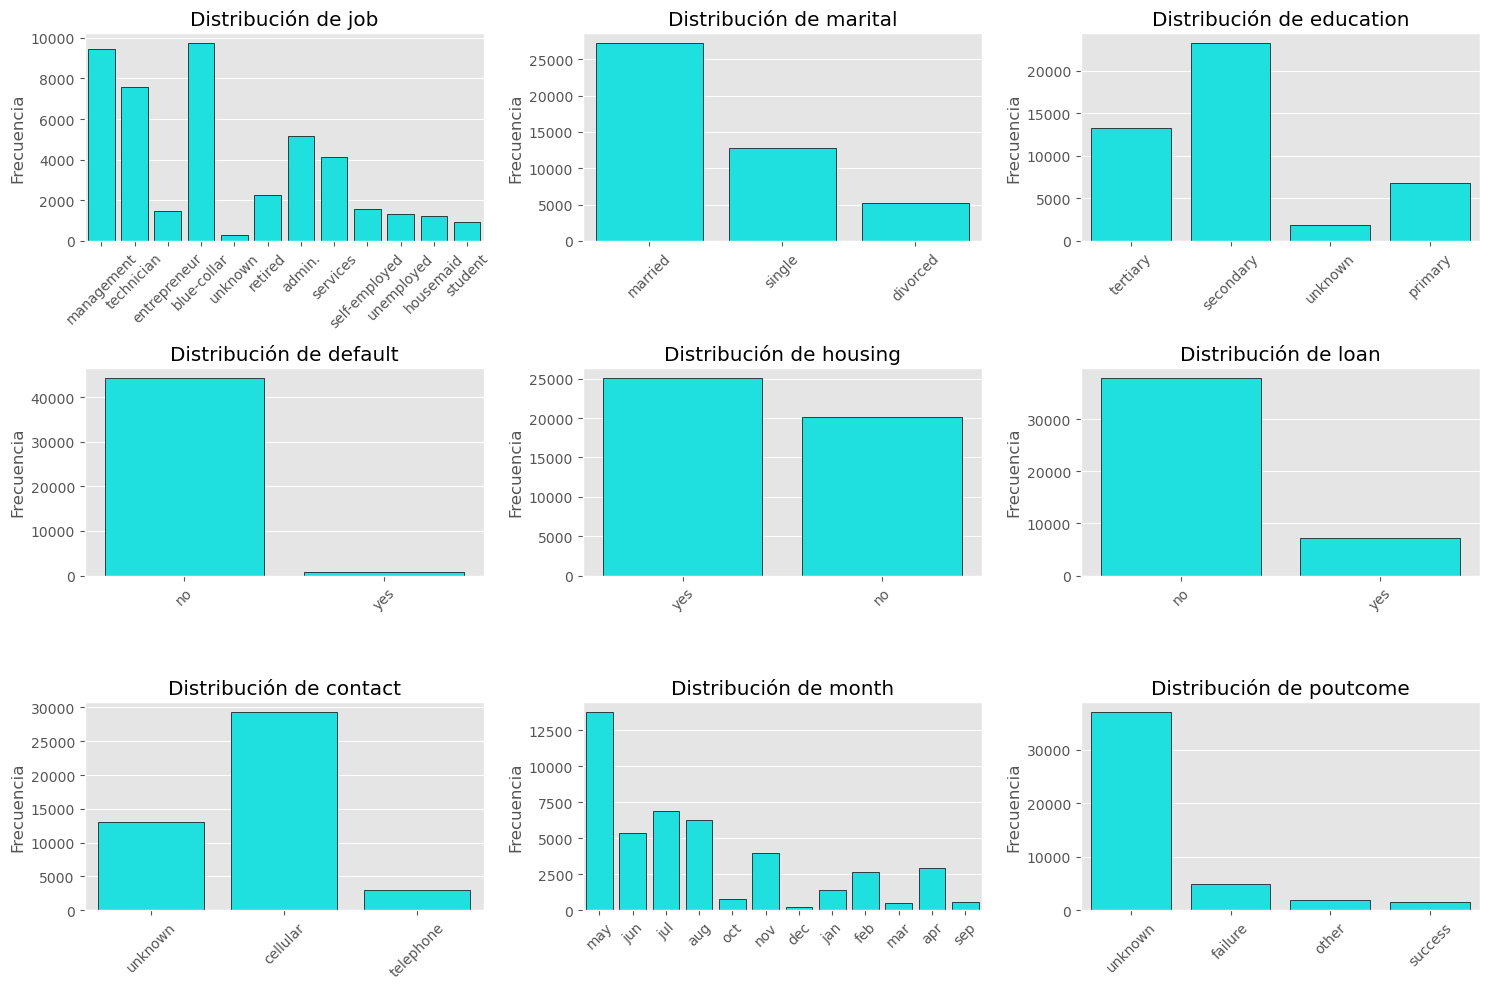

In [17]:
# Distribución de las columnas
fig, axes = plt.subplots(3, 3, figsize=(15, 10)) # Tenemos 9 variables por lo que hacemos 9 gráficos
axes = axes.flatten()

for i, col in enumerate(categoricas):
    ax = axes[i]
    sns.countplot(data=df, x=col, color="aqua", edgecolor="black", ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis="x", rotation=45)
    
plt.tight_layout()

plt.show()

##### **VARIABLES NUMÉRICAS**

In [18]:
# Obtener variables numéricas
numericas = [col for col in df.columns if df[col].dtype in ["float64", "int64"]]

print(f"Cantidad de variables numéricas: {len(numericas)}")
print(f"Variables numéricas: {numericas}")

Cantidad de variables numéricas: 7
Variables numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [19]:
# Resumen estadístico
df[numericas].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
# Búsqueda de outliers
def encontrar_outliers(df, columnas):
    conteo = {}
    for columna in columnas:
        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - iqr * 1.5
        limite_superior = q3 + iqr * 1.5
        
        conteo_outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        
        conteo[columna] = conteo_outliers.shape[0]
    
    return conteo

encontrar_outliers(df, numericas)

{'age': 487,
 'balance': 4729,
 'day': 0,
 'duration': 3235,
 'campaign': 3064,
 'pdays': 8257,
 'previous': 8257}

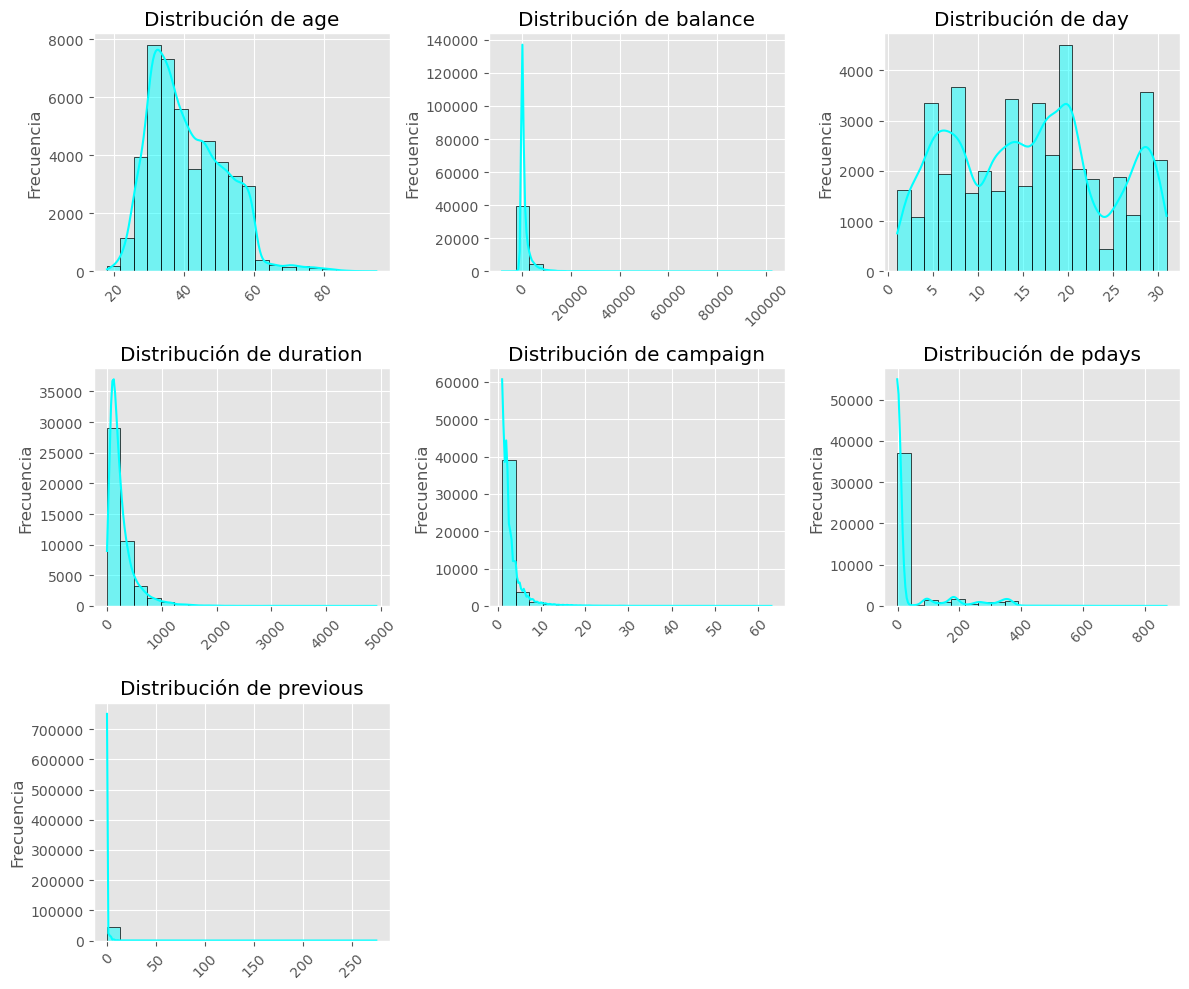

In [21]:
# Distribución de las columnas
fig, axes = plt.subplots(3, 3, figsize=(12, 10)) # Tenemos 9 variables por lo que hacemos 9 gráficos
axes = axes.flatten()

for i, col in enumerate(numericas):
    ax = axes[i]
    sns.histplot(data=df, x=col, color="aqua", edgecolor="black", kde=True, bins=20, ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis="x", rotation=45)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()

plt.show()

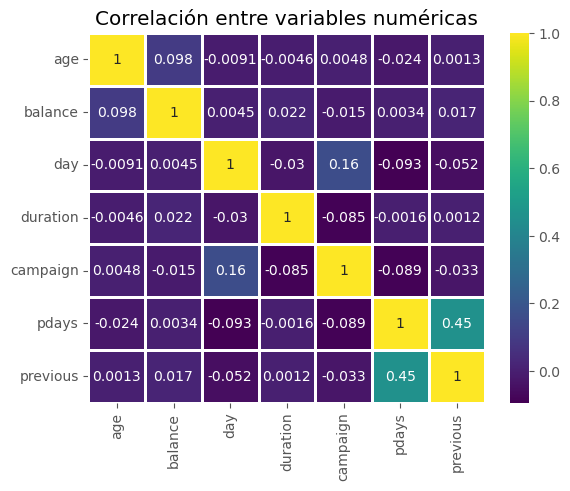

In [22]:
# Correlación entre variables
correlacion = df[numericas].corr()

sns.heatmap(correlacion, annot=True, cmap="viridis", linewidths=1)
plt.title("Correlación entre variables numéricas")

plt.show()

##### **VARIABLE TARGET**

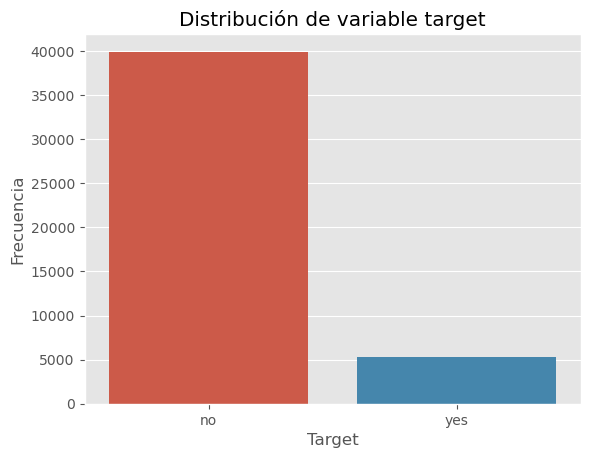

In [23]:
# Distribución de variable target
sns.countplot(data=df, x="y", hue="y")
plt.title("Distribución de variable target")
plt.xlabel("Target")
plt.ylabel("Frecuencia")

plt.show()

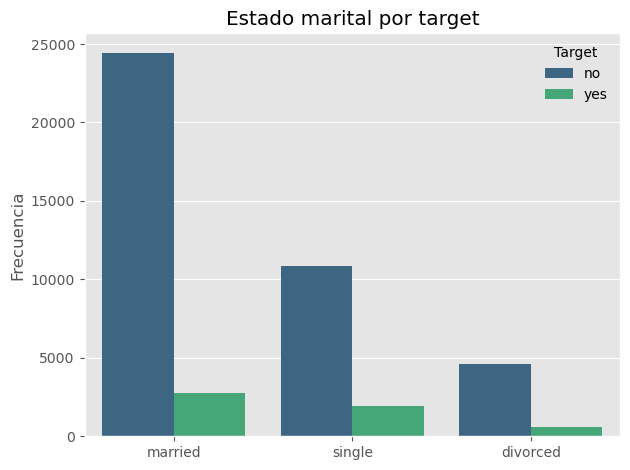

In [24]:
# Estado marital x target
sns.countplot(data=df, x="marital", hue="y", palette="viridis")
plt.title("Estado marital por target")
plt.xlabel("")
plt.ylabel("Frecuencia")

plt.legend(frameon=False, title="Target")

plt.tight_layout()
plt.show()

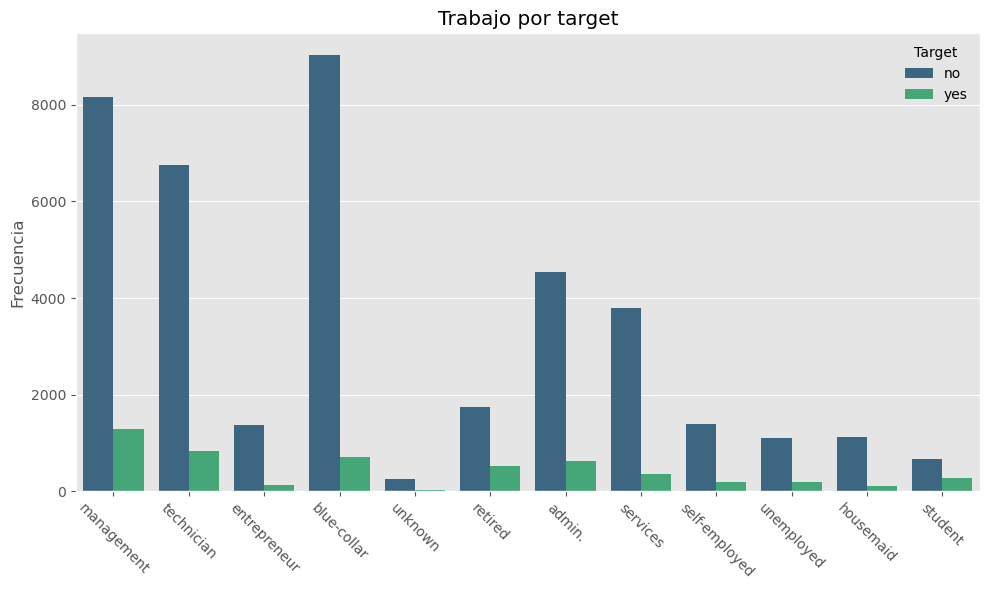

In [25]:
# Trabajo x target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="job", hue="y", palette="viridis")
plt.title("Trabajo por target")
plt.xlabel("")
plt.ylabel("Frecuencia")
plt.xticks(rotation=315)
plt.legend(frameon=False, title="Target")

plt.tight_layout()
plt.show()

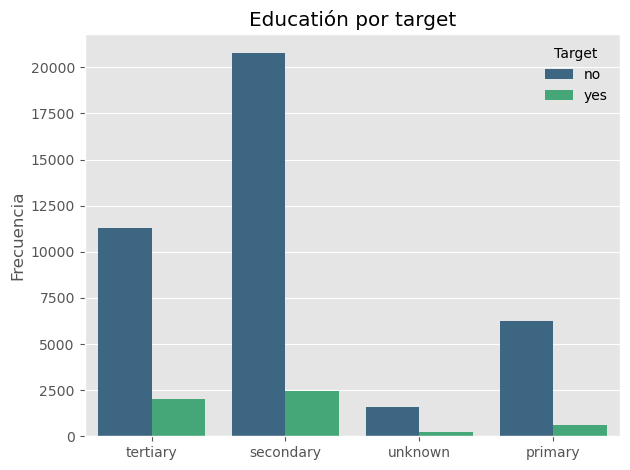

In [26]:
# Educación x target
sns.countplot(data=df, x="education", hue="y", palette="viridis")
plt.title("Educatión por target")
plt.xlabel("")
plt.ylabel("Frecuencia")

plt.legend(frameon=False, title="Target")

plt.tight_layout()
plt.show()

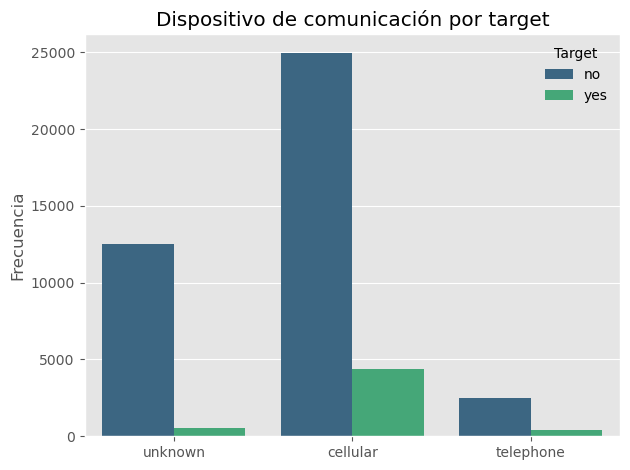

In [27]:
# Tipo de contacto x target
sns.countplot(data=df, x="contact", hue="y", palette="viridis")
plt.title("Dispositivo de comunicación por target")
plt.xlabel("")
plt.ylabel("Frecuencia")

plt.legend(frameon=False, title="Target")

plt.tight_layout()
plt.show()

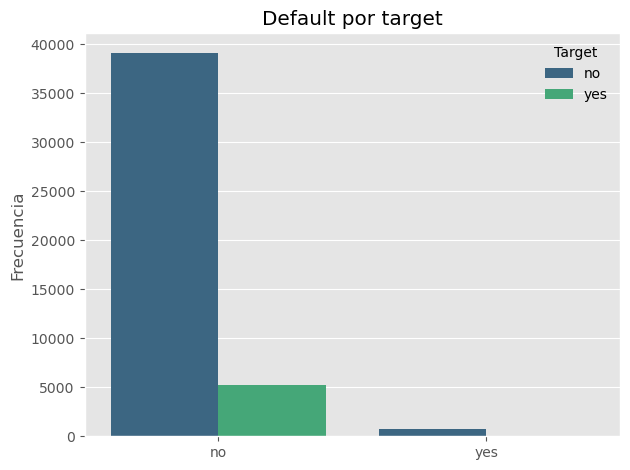

In [28]:
# Default x target
sns.countplot(data=df, x="default", hue="y", palette="viridis")
plt.title("Default por target")
plt.xlabel("")
plt.ylabel("Frecuencia")

plt.legend(frameon=False, title="Target")

plt.tight_layout()
plt.show()

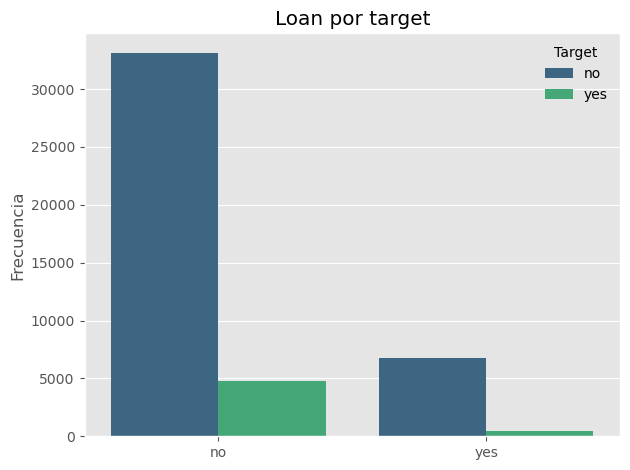

In [29]:
# Loan x target
sns.countplot(data=df, x="loan", hue="y", palette="viridis")
plt.title("Loan por target")
plt.xlabel("")
plt.ylabel("Frecuencia")

plt.legend(frameon=False, title="Target")

plt.tight_layout()
plt.show()

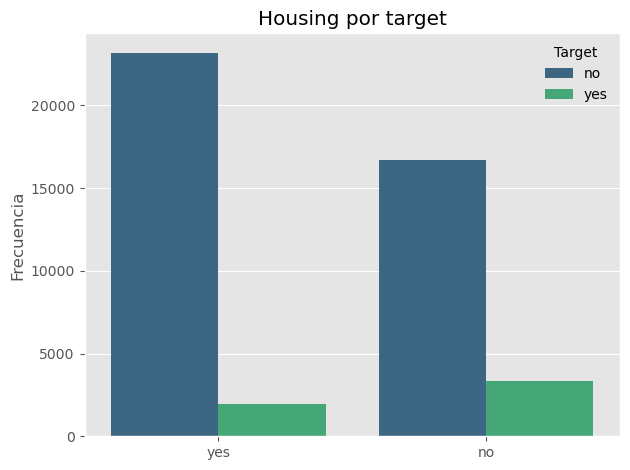

In [30]:
# Housing x target
sns.countplot(data=df, x="housing", hue="y", palette="viridis")
plt.title("Housing por target")
plt.xlabel("")
plt.ylabel("Frecuencia")

plt.legend(frameon=False, title="Target")

plt.tight_layout()
plt.show()

In [31]:
# Promedio de edad por variable target
df.groupby("y")["age"].mean()

y
no     40.838986
yes    41.670070
Name: age, dtype: float64

In [32]:
# Promedio de balance por variable target
df.groupby("y")["balance"].mean()

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [33]:
# Promedio de duración por variable target
df.groupby("y")["duration"].mean()

y
no     221.182806
yes    537.294574
Name: duration, dtype: float64

In [34]:
# Promedio de edad por estado marital
df.groupby("marital")["age"].mean()

marital
divorced    45.782984
married     43.408099
single      33.703440
Name: age, dtype: float64

In [35]:
# Promedio de balance por estado marital
df.groupby("marital")["balance"].mean()

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

In [36]:
# Promedio de balance por trabajo
df.groupby("job")["balance"].mean().sort_values(ascending=False)

job
retired          1984.215106
unknown          1772.357639
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
housemaid        1392.395161
student          1388.060768
technician       1252.632092
admin.           1135.838909
blue-collar      1078.826654
services          997.088108
Name: balance, dtype: float64

## **PREPROCESAMIENTO DE LOS DATOS**

In [37]:
# Eliminamos poutcome
df.drop("poutcome", axis=1, inplace=True)

In [38]:
# Mapeo de valores
mapeo_binario = {"yes":1, "no":0}
mapeo_month = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}

df["default"] = df["default"].map(mapeo_binario)
df["housing"] = df["housing"].map(mapeo_binario)
df["loan"] = df["loan"].map(mapeo_binario)
df["y"] = df["y"].map(mapeo_binario)
df["month"] = df["month"].map(mapeo_month)

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,0


In [40]:
# Encodear variables
one_hot = OneHotEncoder(sparse_output=False)
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

job_encodeado = one_hot.fit_transform(df[["job"]])
job_encodeado = pd.DataFrame(job_encodeado, columns=one_hot.get_feature_names_out(["job"]))

marital_encodeado = one_hot.fit_transform(df[["marital"]])
marital_encodeado = pd.DataFrame(marital_encodeado, columns= one_hot.get_feature_names_out(["marital"]))

df["contact"] = label_encoder.fit_transform(df["contact"])
df["education"] = ordinal_encoder.fit_transform(df[["education"]]).astype(int)

df = pd.concat([df, job_encodeado], axis=1)
df = pd.concat([df, marital_encodeado], axis=1)

df.drop(["job", "marital"], axis=1, inplace=True)

# Float a Int
flotantes = [col for col in df.columns if df[col].dtype == "float64"]
df[flotantes] = df[flotantes].astype(int)

df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2,0,2143,1,0,2,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1,0,29,1,0,2,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1,0,2,1,1,2,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,3,0,1506,1,0,2,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,3,0,1,0,0,2,5,5,198,...,0,0,0,0,0,0,1,0,0,1


In [41]:
# Estandarizar los valores numéricos
scaler = StandardScaler()

df[numericas] = scaler.fit_transform(df[numericas])

df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,1.606965,2,0,0.256419,1,0,2,-1.298476,5,0.011016,...,0,0,0,0,0,0,0,0,1,0
1,0.288529,1,0,-0.437895,1,0,2,-1.298476,5,-0.416127,...,0,0,0,0,1,0,0,0,0,1
2,-0.747384,1,0,-0.446762,1,1,2,-1.298476,5,-0.707361,...,0,0,0,0,0,0,0,0,1,0
3,0.571051,3,0,0.047205,1,0,2,-1.298476,5,-0.645231,...,0,0,0,0,0,0,0,0,1,0
4,-0.747384,3,0,-0.447091,0,0,2,-1.298476,5,-0.233620,...,0,0,0,0,0,0,1,0,0,1


## **FEATURES Y TARGET**

In [42]:
# Features
X = df.drop("y", axis=1)
# Target
y = df["y"]

## **CONJUNTOS DE ENTRENAMIENTO Y PRUEBA**

In [43]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [44]:
estructura_dataframe(X_train)

Cantidad de filas: 36168
Cantidad de columnas: 28
Cantidad de datos: 1012704
Columnas: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')


In [45]:
estructura_dataframe(X_test)

Cantidad de filas: 9043
Cantidad de columnas: 28
Cantidad de datos: 253204
Columnas: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')


## **MODELO**

In [46]:
# Instanciar el modelo
svm = SVC(class_weight="balanced")
# Ajustar el modelo a los datos de entrenamiento
svm.fit(X_train, y_train)
# Predicciones
y_pred = svm.predict(X_test)

In [47]:
# Métricas
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(f"Accuracy score: {round(accuracy, 4)}")
print(f"Recall score: {round(recall, 4)}")

Accuracy score: 0.8097
Recall score: 0.8611


In [48]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7985
           1       0.37      0.86      0.51      1058

    accuracy                           0.81      9043
   macro avg       0.67      0.83      0.70      9043
weighted avg       0.91      0.81      0.84      9043



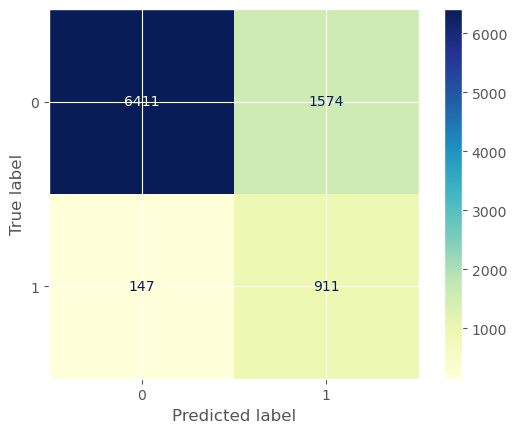

In [49]:
# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_mat)

disp.plot(cmap="YlGnBu")